In [114]:
import numpy as np
import torch
import torch.nn as nn

from sklearn import datasets
import matplotlib.pyplot as plt

# Linear Regression

In [115]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32)).reshape(-1, 1)

n_samples, n_features = X.shape
X.shape

torch.Size([100, 1])

In [116]:
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

In [117]:
for epoch in range(100):
    y_pred = model(X)
    loss = criterion(y, y_pred)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


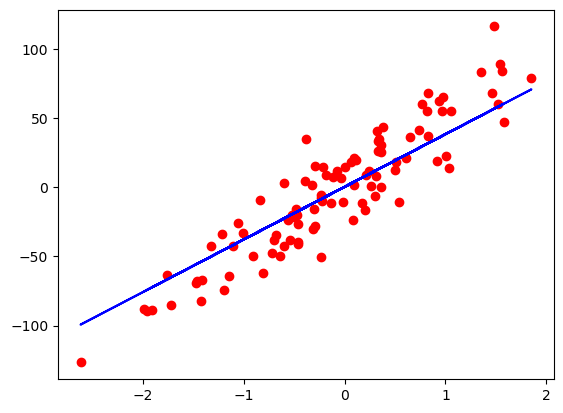

In [118]:
prediction = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, prediction, 'b')

# Dataset and Data loader

In [119]:
from torch.utils.data import Dataset, DataLoader


In [120]:
class WineDataset(Dataset):
    def __init__(self):
        xy = np.loadtxt('wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, 0])
        self.n_samples = xy.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.n_samples
    

dataset = WineDataset()
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True)


In [121]:
class Classification(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.lr = nn.Linear(input_size, output_size)
        
    def forward(self, X):
        pass

In [122]:
total_samples = len(dataset)
num_batches = total_samples // 4 + 1
total_samples, num_batches

(178, 45)

In [123]:
num_epochs = 2
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        print(f'epoch {epoch+1}/{num_epochs} and minibatch {i+1}/{num_batches}, input shape is {inputs.shape}')
    

epoch 1/2 and minibatch 1/45, input shape is torch.Size([4, 13])
epoch 1/2 and minibatch 2/45, input shape is torch.Size([4, 13])
epoch 1/2 and minibatch 3/45, input shape is torch.Size([4, 13])
epoch 1/2 and minibatch 4/45, input shape is torch.Size([4, 13])
epoch 1/2 and minibatch 5/45, input shape is torch.Size([4, 13])
epoch 1/2 and minibatch 6/45, input shape is torch.Size([4, 13])
epoch 1/2 and minibatch 7/45, input shape is torch.Size([4, 13])
epoch 1/2 and minibatch 8/45, input shape is torch.Size([4, 13])
epoch 1/2 and minibatch 9/45, input shape is torch.Size([4, 13])
epoch 1/2 and minibatch 10/45, input shape is torch.Size([4, 13])
epoch 1/2 and minibatch 11/45, input shape is torch.Size([4, 13])
epoch 1/2 and minibatch 12/45, input shape is torch.Size([4, 13])
epoch 1/2 and minibatch 13/45, input shape is torch.Size([4, 13])
epoch 1/2 and minibatch 14/45, input shape is torch.Size([4, 13])
epoch 1/2 and minibatch 15/45, input shape is torch.Size([4, 13])
epoch 1/2 and minib

# FeedForward NN

In [124]:
import torchvision
import torchvision.transforms as transforms

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

In [125]:
input_size = 784
hidden_size = 100
num_classes = 10
batch_size = 100
lr = 1e-3

# importing dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

examples = iter(train_loader)
samples, labels = next(examples)
samples.shape, labels.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

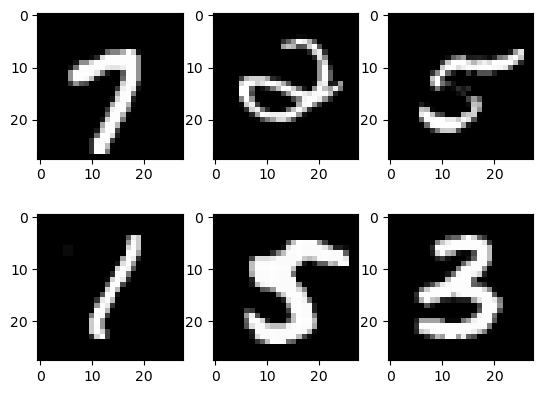

In [126]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i, 0], cmap='gray')

In [127]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
        
model = NeuralNet(input_size, hidden_size, num_classes)

In [128]:
# loss and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [129]:
# training loop
n_total_steps = len(train_loader)
num_epochs = 2

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        images = images.flatten(1, -1).to(device)
        labels = labels.to(device)
        
        output = model(images)
        
        # loss
        loss = criterion(output, labels)
        
        # zero grads
        optimizer.zero_grad()
        
        # calculate gradients in graph
        loss.backward()
        
        # optimizer step
        optimizer.step()
        
        if (i+1)%100 == 0:
            print(f'epoch {epoch}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f} ')

epoch 0/2, step 100/600, loss = 0.4915 
epoch 0/2, step 200/600, loss = 0.3253 
epoch 0/2, step 300/600, loss = 0.2844 
epoch 0/2, step 400/600, loss = 0.2114 
epoch 0/2, step 500/600, loss = 0.2915 
epoch 0/2, step 600/600, loss = 0.4647 
epoch 1/2, step 100/600, loss = 0.1573 
epoch 1/2, step 200/600, loss = 0.1967 
epoch 1/2, step 300/600, loss = 0.1945 
epoch 1/2, step 400/600, loss = 0.0991 
epoch 1/2, step 500/600, loss = 0.2112 
epoch 1/2, step 600/600, loss = 0.1274 


In [130]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for i, (images, labels) in enumerate(test_loader):
        images = images.flatten(1, -1).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')

accuracy = 95.18
